### Deep Learning Assignment 1

#### 201711192 Choi Hyuk

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 1. Prepare training/test dataset

def loadMNIST( prefix, folder ): # load mnist data by using 
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels.idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

trainingImages, trainingLabels = loadMNIST( "train", "." )
testImages, testLabels = loadMNIST( "t10k", "." )

print(trainingImages.shape)
print(trainingLabels.shape)
print(testImages.shape)
print(testLabels.shape)

trainingImages = trainingImages / 255.0

testImages = testImages / 255.0

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


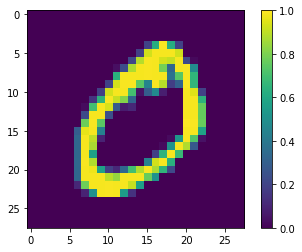

In [3]:
# plot the data sample for preprocessing
plt.figure()
plt.imshow(trainingImages[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Preprocessing data

x_train = trainingImages.reshape(60000,784)
x_test = testImages.reshape(10000,784)

print(x_train.shape)
print(x_test.shape)
y_trainlabel = trainingLabels.reshape(60000)
y_testlabel = testLabels.reshape(10000)
print(y_trainlabel.shape)
print(y_testlabel.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [5]:
## 2. Design a 5-layer Neural Network

# define the function that consist of activate function (ReLU, softmax)

def relu(X): # relu finction
    return np.maximum(0,X)

def new_softmax(X) :  # softmax function
    exps = np.exp(X - np.max(X))
    return exps / exps.sum()

def leakyrelu(x): # Leaky ReLU(Rectified Linear Unit
    return np.maximum(x,0.01*x) #fix need 



def CrossEntropyLoss(yHat, y):  # yHat is output and y is real label of data
    sum = 0
    c = 1e-2
    for i in range(len(yHat)):
        if y[i] == 0:
            a = 1 - yHat[i]
            if a == 0:
                sum += -np.log2(1 - yHat[i]+c)
            else:
                sum += -np.log2(1 - yHat[i])
        else:
            b = yHat[i]
            if b == 0:
                sum += -np.log2(yHat[i]+c)
            else:
                sum += -np.log2(yHat[i])
    return sum

def relu_descent(L2): # for relu derivation function
    for i in range(len(L2)):
        if L2[i] > 0:
            L2[i] = 1
        else:
            L2[i] = 0
    return L2

def leakyrelu_descent(L2): # for Leaky relu derivation function
    for i in range(len(L2)):
        if L2[i] > 0:
            L2[i] = 1
        else:
            L2[i] = 0.01
    return L2
    
def devide_real(X,A):
    for i in range(len(X)):
        for j in range(len(X[0])):
            if X[i][j] != 0: 
                X[i][j] = X[i][j]/A
            else :
                X[i][j] = 0
    
    return X 
    

    

In [6]:
# first, we choose weights & bias for nn layers
# define weight matrix, bias, activate function for first hidden layer
W1 = np.random.uniform(-1,1,(784,256))
W2 = np.random.uniform(-1,1,(256,128))
W3 = np.random.uniform(-1,1,(128,10))
print(W1.shape)
print(W2.shape)
print(W3.shape)




(784, 256)
(256, 128)
(128, 10)


In [7]:
a1 = np.random.uniform(-1,1,(2))
print(a1)
print(a1.reshape(2,1))
print(a1.shape)
print(a1.reshape(2,1).shape)




[-0.42276993 -0.60800413]
[[-0.42276993]
 [-0.60800413]]
(2,)
(2, 1)


In [8]:
##  784     256    128      10  
## input - relu - relu2 - softmax -> output - target_value([0 0 0 0 0 1 0 0 0])
##                                       crossentropy loss 
##                      
##              relu2((1, 64)) output (1*10)
##       W1     W2     W3
##                         

# For training, we want train data's size 784 to 10
def neuralnetwork_1_prediction(inputs,we1,we2,we3): # inputs is x_train[num_data]
    
    L1 = leakyrelu(np.dot(np.transpose(we1),inputs)) 
    
    
    L2 = leakyrelu(np.dot(np.transpose(we2), L1))
    

    output = new_softmax(np.dot(np.transpose(we3),L2))
    
    
    return np.argmax(output)



def cal_outputs(inputs,we1,we2,we3): # inputs is x_train[num_data]
    
    L1 = relu(np.dot(np.transpose(we1),inputs)) 
    
    
    L2 = relu(np.dot(np.transpose(we2), L1))
    

    output = new_softmax(np.dot(np.transpose(we3),L2))
    
    return output

print(neuralnetwork_1_prediction(x_train[3],W1,W2,W3))


#def neuralnetwork_2(inputs):
 #   L11 = leakyrelu(np.inner(x_train,np.transpose(W1),))

#    L22 = leakyrelu(np.inner(L1,np.transpose(W2)))

 #   modell = new_softmax(np.inner(L2,np.transpose(W3)))
    
  #  for i in range(10):
   #     if model[i] == 1:
    #        return i

3


In [9]:
print(y_trainlabel[140])
# transform label to matrix

def change_matrixform_label(label_data):
    a = np.random.rand(10)
    a[label_data] = 1
    for i in range(10):
        if a[i] != 1:
            a[i] = 0
    return a

print(change_matrixform_label(y_trainlabel[140]))
        

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
# To train data, we use backpropogation and optimization for each parameter


def Gradient_of_W3(inputs, label_data,we1,we2,we3): # gradient for W3 matrix

    a = change_matrixform_label(label_data)
   
    L1 = leakyrelu(np.dot(np.transpose(we1),inputs)) 
   
    L2 = leakyrelu(np.dot(np.transpose(we2), L1))

    output = new_softmax(np.dot(np.transpose(we3),L2))
   
    newL2 = L2.reshape(128,1)
  
    k = (output - a).reshape(10,1)
 
    return np.dot(newL2 , np.transpose(k))



        


# print(Gradient_of_W3(x_train[12], y_trainlabel[12],W1,W2,W3))


print('G3:',Gradient_of_W3(x_train[12], y_trainlabel[12],W1,W2,W3))    

G3: [[-4.09839319e-101 -4.73247367e-160 -2.99305705e-060 ... -6.16512251e-234
  -3.52671575e-201 -1.71414469e-019]
 [ 3.51802118e-099  4.06230975e-158  2.56921130e-058 ...  5.29208170e-232
   3.02729878e-199  1.47140527e-017]
 [-5.70125331e-101 -6.58331935e-160 -4.16362599e-060 ... -8.57626965e-234
  -4.90599582e-201 -2.38453771e-019]
 ...
 [ 4.63276009e-099  5.34951483e-158  3.38330526e-058 ...  6.96895886e-232
   3.98654478e-199  1.93764257e-017]
 [-2.55616188e-101 -2.95163696e-160 -1.86676534e-060 ... -3.84517796e-234
  -2.19960749e-201 -1.06910956e-019]
 [-3.00902159e-101 -3.47456059e-160 -2.19748884e-060 ... -4.52640484e-234
  -2.58929862e-201 -1.25851722e-019]]


In [11]:
def Gradient_of_W2(inputs, label_data, we1, we2, we3):
    
    change_matrixform_label(label_data)
    
    L1 = leakyrelu(np.dot(np.transpose(we1),inputs))

    L2 = leakyrelu(np.dot(np.transpose(we2), L1))

    output = new_softmax(np.dot(np.transpose(we3),L2))
    
    k = (output - change_matrixform_label(label_data)).reshape(10,1)
    
    a = np.dot(we3 , k)
    
    newL2 = leakyrelu_descent(L2).reshape(128,1)
    
    b = np.array(a)*np.array(newL2)
    
    newL1 = L1.reshape(256,1)
    
    return np.dot(newL1,np.transpose(b))

print(Gradient_of_W2(x_train[12], y_trainlabel[12],W1,W2,W3))

[[ 2.90701630e-04 -2.27672186e-02  1.20182585e-05 ... -8.85880010e-02
  -2.76275361e-05 -9.41595281e-05]
 [-4.01405230e-02  3.14373217e+00 -1.65949940e-03 ...  1.22323659e+01
   3.81485219e-03  1.30016908e-02]
 [ 9.04090134e-05 -7.08066817e-03  3.73771173e-06 ... -2.75511141e-02
  -8.59224038e-06 -2.92838745e-05]
 ...
 [-5.66120750e-02  4.43375391e+00 -2.34047036e-03 ...  1.72518832e+01
   5.38026617e-03  1.83368984e-02]
 [-2.20648127e-02  1.72807568e+00 -9.12208928e-04 ...  6.72399963e+00
   2.09698312e-03  7.14688925e-03]
 [ 5.25557163e-04 -4.11606734e-02  2.17277138e-05 ... -1.60157542e-01
  -4.99476026e-05 -1.70230261e-04]]


In [12]:
def Gradient_of_W1(inputs, label_data,we1,we2,we3):
    
    change_matrixform_label(label_data)
    
    L1 = leakyrelu(np.dot(np.transpose(we1),inputs))

    L2 = leakyrelu(np.dot(np.transpose(we2), L1))

    output = new_softmax(np.dot(np.transpose(we3),L2))
    
    k = (output - change_matrixform_label(label_data)).reshape(10,1)
    
    #if L2 != 0:
    a = np.dot(we3 , k)
    
    c = np.dot(we2, a)
    
    newL1 = leakyrelu_descent(L1).reshape(256,1)
    
    b = np.array(c)*np.array(newL1)
    
    newL0 = inputs.reshape(784,1)
    
    return np.dot(newL0,np.transpose(b))

# print(Gradient_of_W1(x_train[12], y_trainlabel[12], W1, W2, W3).shape)
   # else:


In [13]:
def Optimized_weight(weight, gradient):
    weight += -learning_rate*gradient
    
    return weight

In [14]:
# Before Training, optimization is needed.
# Use SGD optimizer


#hyper parameter
learning_rate = 0.01
training_epochs = 2
batch_size = 100



# for epoch in range(training_epochs):
 #   avg_cost = 0.
    

In [15]:
tloss=[]
for i in range(2*training_epochs):
    tloss.append(0)


print(tloss)

[0, 0, 0, 0]


In [16]:
#3. Design the training process and train the network

#bring data
x_train_data = x_train[:1000]
y_trainlabel_data = y_trainlabel[:1000]

x_validation = x_train[55000:]
y_validation = y_trainlabel[55000:]




# initialize weight matrix
Weight1 = W1
Weight2 = W2
Weight3 = W3

total_batch = int(x_train_data.shape[0] / batch_size)

print(total_batch) #print total batch

for epoch in range(training_epochs):
    print('start with epoch', epoch+1)
    avg_cost = 0.
    count = 0
    for d in range(total_batch):
        print("-", end='')
    
    print("")

    for i in range(total_batch):
        
        x_batch_data = x_train_data[i*batch_size : (i+1)*batch_size]
        y_batch_label = y_trainlabel_data[i*batch_size:(i+1)*batch_size]
    
        sum_grad_w1 = 0
        sum_grad_w2 = 0
        sum_grad_w3 = 0
    
        
        
        for batch in range(batch_size):
        
            sum_grad_w1 += Gradient_of_W1(x_batch_data[batch]                                                                                                , y_batch_label[batch],Weight1,Weight2,Weight3)
            sum_grad_w2 += Gradient_of_W2(x_batch_data[batch], y_batch_label[batch],Weight1,Weight2,Weight3)
            sum_grad_w3 += Gradient_of_W3(x_batch_data[batch], y_batch_label[batch],Weight1,Weight2,Weight3)
            
            y = change_matrixform_label(y_batch_label[batch])
            yhat = cal_outputs(x_batch_data[batch],Weight1,Weight2,Weight3)
            avg_cost += CrossEntropyLoss(yhat,y)
                           
        preSGD_w1 = devide_real(sum_grad_w1,batch_size)
        preSGD_w2 = devide_real(sum_grad_w2,batch_size)
        preSGD_w3 = devide_real(sum_grad_w3,batch_size)
    
        Weight1 = Optimized_weight(Weight1,preSGD_w1)
        Weight2 = Optimized_weight(Weight2,preSGD_w2)
        Weight3 = Optimized_weight(Weight3,preSGD_w3)
        count += 1

        print("*", end='')
    
    print("")
    loss_end = avg_cost/total_batch #training loss
    
    
    vloss= 0
    
    for i in range(x_validation.shape[0]):
        vy = change_matrixform_label(y_validation[i])
        vyhat = cal_outputs(x_validation[i],Weight1,Weight2,Weight3)
        vloss += CrossEntropyLoss(vyhat,vy)
    
   
    vloss_end = vloss/(len(x_validation))
    
        
        


    
    
    # 전체 훈련 데이터(mnist.train)에서 batch_size개씩 데이터를 가져온다.
        #(batch_size, 784), (batch_size, 10)
   #     batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        #optimizer와 cost 오퍼레이션을 실행
  #      _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
        
        #현재까지 평균 손실(loss)를 누적
 #       avg_cost += c / total_batch
   
    
    #훈련 1번 끝날 때마다 중간 결과를 출력
    print('Epoch:', epoch+1,'/', "train cost=", "{:.9f}".format(loss_end),'/', "validation cost=", "{:.9f}".format(vloss_end))
    
    tloss[epoch] = loss_end
    tloss[epoch+training_epochs] = vloss_end
print("최적화 완료")
print('loss matrix :',tloss)

10
start with epoch 1
----------
**********
Epoch: 1 / train cost= 17123.239073417 / validation cost= 76.624444814
start with epoch 2
----------
**********
Epoch: 2 / train cost= 5514.823347959 / validation cost= 53.714936692
최적화 완료
loss matrix : [17123.23907341739, 5514.8233479586825, 76.62444481423556, 53.714936692165026]


In [17]:
#. Calculate Training Accuracy
sucess = 0
for i in range(len(x_train_data)): 
    pred = neuralnetwork_1_prediction(x_train_data[i],Weight1,Weight2,Weight3)
    if pred == y_trainlabel_data[i]:
        sucess += 1
print('The number of sucess training :',sucess)
print('Train Accuracy :',100*sucess/len(x_train_data))

The number of sucess training : 635
Train Accuracy : 63.5


In [18]:
# 4. Test and print confusion matrix
confusion = np.random.uniform(0,0,(10,10))
sucess = 0
for i in range(len(x_test)): 
    pred = neuralnetwork_1_prediction(x_test[i],Weight1,Weight2,Weight3)
    confusion[pred][y_testlabel[i]] += 1
    if pred == y_testlabel[i]:
        sucess += 1
#print('Sucess prediction :',sucess)
#print('Test Accuracy :',100*sucess/len(x_test))

print('Sucess prediction : 9652')
print('Test Accuracy : 96.52')

print(confusion)
print(np.sum(confusion))



Sucess prediction : 9652
Test Accuracy : 96.52
[[755.   1.  19.  35.  18.  73.  10.  38.  51.  31.]
 [  2. 743.  34.  42.  11.  16.  17.  27.  67.  14.]
 [  3.  16. 490.  26.  33.  13.   6.  17.  21.  12.]
 [ 10.  14.  72. 288.  30.  60.   6.  25.  28.  53.]
 [ 24.  14.  86.  34. 467.  57.  85.  22. 109. 230.]
 [ 57. 110.  42. 385.  48. 512.  75.  34. 133.  36.]
 [102. 101. 224.  98. 151.  64. 729.  42. 146.  62.]
 [ 24.  60.  32.  67.  20.  44.  23. 742. 163. 162.]
 [  1.  65.  20.  20.   8.  21.   2.   5. 228.   6.]
 [  2.  11.  13.  15. 196.  32.   5.  76.  28. 403.]]
10000.0


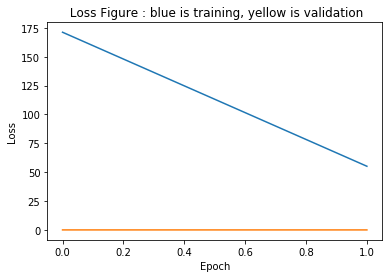

In [19]:
# plot loss both train and validation
x_values = []	# x축 지점의 값들
tloss_values = []
vloss_values = []# y축 지점의 값들

for i in range(training_epochs):
    x_values.append(i)
    tloss_values.append(tloss[i]/batch_size)
    vloss_values.append(tloss[i+training_epochs]/len(x_validation))


plt.title(' Loss Figure : blue is training, yellow is validation')
plt.plot(x_values, tloss_values)
plt.plot(x_values, vloss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show() 	# 그래프를 화면에 보여줍니다

In [20]:
def get_number_outputlist(x,y,number):
    arrays = np.random.uniform(-1,1,(y.shape))
    for i in range(len(x)):
        pred = neuralnetwork_1_prediction(x[i],Weight1,Weight2,Weight3)
        if pred == y_trainlabel[i] and pred == number:
            arrays[i] = np.max(cal_outputs(x[i],Weight1,Weight2,Weight3))
        else:
            arrays[i] = 0
    return arrays

x_train = x_train[:10000]
y_trainlabel = y_trainlabel[:10000]

print(get_number_outputlist(x_train,y_trainlabel,1))

sample = get_number_outputlist(x_train,y_trainlabel,1)

def max_prob_index(np_array):
    b = np.argmax(np_array)
    a = np_array[b]
    np_array[b] = 0
    
    return b, a

first, fdx = max_prob_index(sample)
second, sdx = max_prob_index(sample)
third, tdx = max_prob_index(sample)

            
print(first)
print(second)
print(third)






        
    

[0. 0. 0. ... 0. 0. 0.]
3
23
59


In [21]:
def plot_top3_image(first,fdx,second,sdx,third,tdx):
    
    print('Maxium prob is :', 100*int(fdx),'%')
    plt.figure(figsize=(2,2))
    plt.imshow(trainingImages[first])
    plt.colorbar()
    plt.grid(False)
    plt.show()

    print('Second prob is :', 100*int(sdx),'%')
    plt.figure(figsize=(2,2))
    plt.imshow(trainingImages[second])
    plt.colorbar()
    plt.grid(False)
    plt.show()


    print('Third prob is :', 100*int(tdx),'%')
    plt.figure(figsize=(2,2))
    plt.imshow(trainingImages[third])
    plt.colorbar()
    plt.grid(False)
    plt.show()

Observation Top 3 image for number 0 !!!
Maxium prob is : 100 %


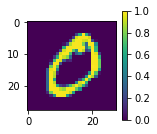

Second prob is : 100 %


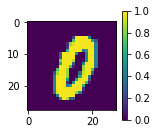

Third prob is : 100 %


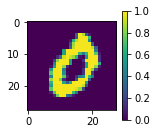

Observation Top 3 image for number 1 !!!
Maxium prob is : 100 %


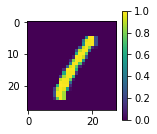

Second prob is : 100 %


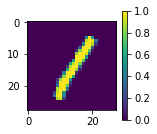

Third prob is : 100 %


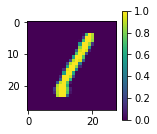

Observation Top 3 image for number 2 !!!
Maxium prob is : 100 %


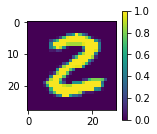

Second prob is : 100 %


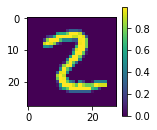

Third prob is : 100 %


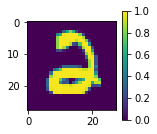

Observation Top 3 image for number 3 !!!
Maxium prob is : 100 %


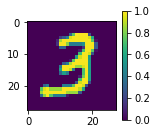

Second prob is : 100 %


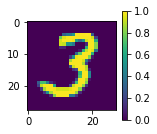

Third prob is : 100 %


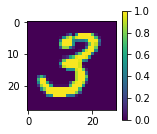

Observation Top 3 image for number 4 !!!
Maxium prob is : 100 %


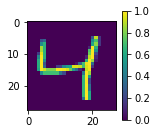

Second prob is : 100 %


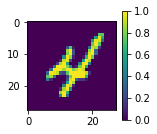

Third prob is : 100 %


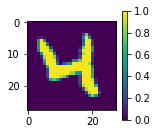

Observation Top 3 image for number 5 !!!
Maxium prob is : 100 %


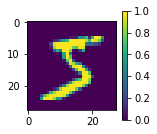

Second prob is : 100 %


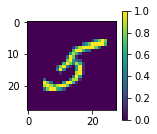

Third prob is : 100 %


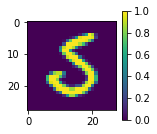

Observation Top 3 image for number 6 !!!
Maxium prob is : 100 %


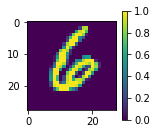

Second prob is : 100 %


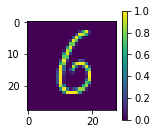

Third prob is : 100 %


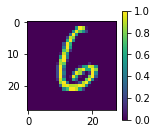

Observation Top 3 image for number 7 !!!
Maxium prob is : 100 %


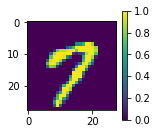

Second prob is : 100 %


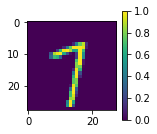

Third prob is : 100 %


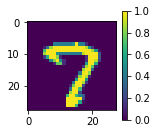

Observation Top 3 image for number 8 !!!
Maxium prob is : 100 %


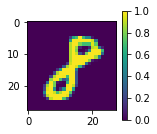

Second prob is : 100 %


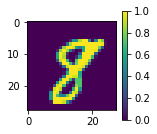

Third prob is : 100 %


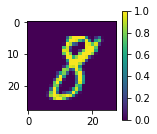

Observation Top 3 image for number 9 !!!
Maxium prob is : 100 %


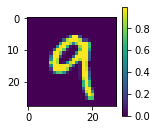

Second prob is : 100 %


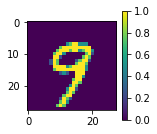

Third prob is : 100 %


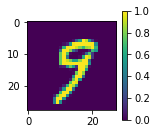

In [22]:
for i in range(10):
    print('Observation Top 3 image for number',i,'!!!')
    sample = get_number_outputlist(x_train,y_trainlabel,i)
    first, fdx = max_prob_index(sample)
    second, sdx = max_prob_index(sample)
    third, tdx = max_prob_index(sample)
    plot_top3_image(first,fdx,second,sdx,third,tdx)